This notebook is modivied version from Anscombe transformation from /Analysis/Theory/Anscombe transformation.ipynb notebook in [SpatialDE](https://github.com/Teichlab/SpatialDE) package

In [1]:
%pylab inline
import pandas as pd
#import plotnine as p

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import optimize

In [3]:
lc_ld = pd.read_csv('../data/low_counts_low_dispersion_0.csv', index_col=0)

In [4]:
lc_hd = pd.read_csv('../data/low_counts_high_dispersion_0.csv', index_col=0)

In [5]:
hc_ld = pd.read_csv('../data/high_counts_low_dispersion_0.csv', index_col=0)

In [6]:
hc_hd = pd.read_csv('../data/high_counts_high_dispersion_0.csv', index_col=0)

In [7]:
fission = pd.read_csv('../data/fission_normalized_counts.csv', index_col=0)

In [8]:
data = {
    'low_counts_low_dispersion_0': lc_ld,
    'low_counts_high_dispersion_0': lc_hd,
    'high_counts_low_dispersion_0': hc_ld,
    'high_counts_high_dispersion_0': hc_hd,
    'fission_normalized_counts': fission,
}

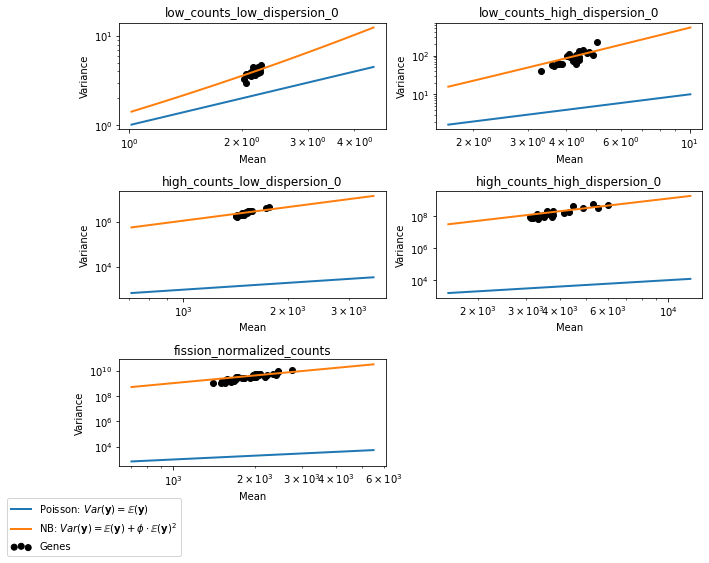

In [9]:
figsize(10, 8)

i = 0
for dname in data:
    i += 1
    
    plt.subplot(3, 2, i)
    
    ds = data[dname]

    xmin, xmax = ds.mean().min() / 2, ds.mean().max() * 2

    phi_hat, _ = optimize.curve_fit(lambda mu, phi: mu + phi * mu ** 2,
                                    ds.mean(),
                                    ds.var())

    xx = np.logspace(log10(xmin), log10(xmax))

    plt.loglog()
    plt.scatter(ds.mean(), ds.var(), c='k', label='Genes', rasterized=True)
    plt.plot([xmin, xmax], [xmin, xmax], label='Poisson: $ Var(\mathbf{y}) = \mathbb{E}(\mathbf{y}) $', lw=2)
    plt.plot(xx, xx + phi_hat * xx ** 2, label='NB: $ Var(\mathbf{y}) = \mathbb{E}(\mathbf{y}) + \phi \cdot \mathbb{E}(\mathbf{y})^2 $', lw=2)

    plt.title(dname);
    plt.xlabel('Mean')
    plt.ylabel('Variance');
    
plt.legend(scatterpoints=3, bbox_to_anchor=(0.25, -0.25))
    
plt.tight_layout()


In [10]:
import NaiveDE

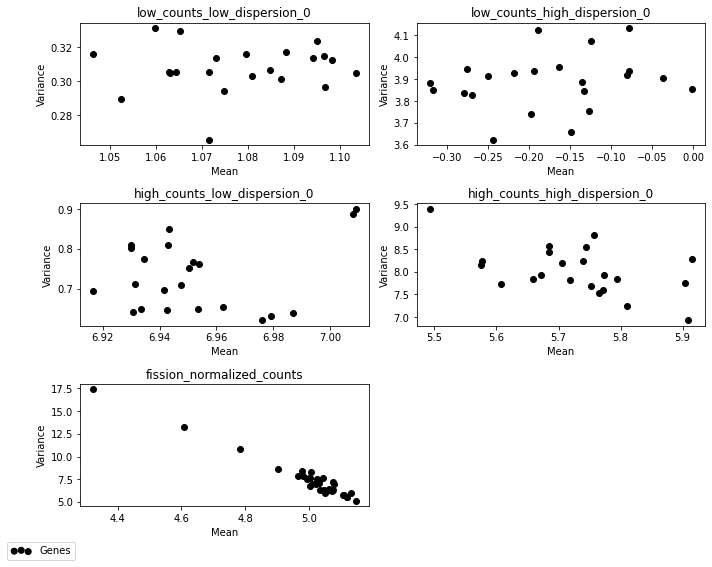

In [11]:
i = 0
for dname in data:
    i += 1
    
    plt.subplot(3, 2, i)

    ds = data[dname]
    sds = NaiveDE.stabilize(ds.T).T
    
    plt.scatter(sds.mean(), sds.var(), c='k', label='Genes', rasterized=True)
    
    plt.title(dname);
    plt.xlabel('Mean')
    plt.ylabel('Variance');
    
plt.legend(scatterpoints=3, bbox_to_anchor=(0.0, -0.25))

plt.tight_layout()

#plt.savefig('Anscombe-mean-vs-var.pdf', bbox_inches='tight', dpi=200)

In [12]:
def vst(expression_matrix):
    from scipy import optimize
    v = lambda mu, phi: mu + phi * mu ** 2
    phi_hat, _ = optimize.curve_fit(v, expression_matrix.mean(1), expression_matrix.var(1))
    print(phi_hat)

    return 2 * np.arcsinh(np.sqrt(phi_hat[0] * expression_matrix)) / np.sqrt(phi_hat[0])

[0.39284969]
[5.11414881]
[1.11499829]
[13.07154249]
[1072.72310728]


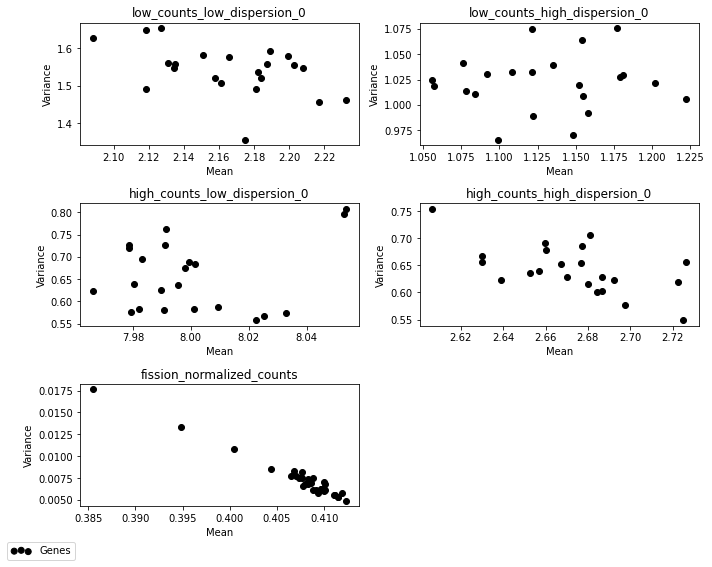

In [13]:
i = 0
for dname in data:
    i += 1
    
    plt.subplot(3, 2, i)

    ds = data[dname]
    sds = vst(ds.T).T
    sds.to_csv('../data/Anscombe_transformation_'+str(dname)+'.csv')
    plt.scatter(sds.mean(), sds.var(), c='k', label='Genes', rasterized=True)
    
    plt.title(dname);
    plt.xlabel('Mean')
    plt.ylabel('Variance');
    
plt.legend(scatterpoints=3, bbox_to_anchor=(0.0, -0.25))

plt.tight_layout()